In [ ]:
!pip install -qqq transformers==4.20.1 --progress-bar off
!pip install -qqq pytorch-lightning==1.6.4 --progress-bar off
!pip install -qqq pytesseract --progress-bar off
!pip install -qqq Pillow==9.0.1 --progress-bar off

In [1]:
pip install transformers==4.20.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.4 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 15.3 MB/s eta 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.1
    Uninstalling tokenizers-0.10.1:
      Successfully uninstalled tokenizers-0.10.1
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.12
    Uninstalling huggingface-hub-0.0.12:
      Successfully uninstalled huggingface-hub-0.0.12
  Attempting uninstall: transformers
    Found existing installation: transformers 4.9.1
    Uninstalling transformers-4.9.1:
      Successfully uninstalled transformers-4.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spac

In [2]:
pip install pytorch-lightning==1.6.4

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 585 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 189 kB 14.5 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: fsspec
    Found existing installation: fsspec 0.8.4
    Uninstalling fsspec-0.8.4:
      Successfully uninstalled fsspec-0.8.4
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
threepio 1.2.0 requires PyYAML==5.3.1, but you have pyyaml 6.0 which is incompatible.
thinc 8.0.3 requires typing-extensions<4.0.0.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.0.6 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy-transformers 1.0.2 requires transformers<4.6.0,>=3.4.0, but you have transformers 4.20.1 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Pillow==9.0.1

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.0 MB 4.2 MB/s eta 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.3.0
    Uninstalling Pillow-9.3.0:
      Successfully uninstalled Pillow-9.3.0
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

from transformers import LayoutLMv3FeatureExtractor, LayoutLMv3TokenizerFast, LayoutLMv3Processor, LayoutLMv3ForSequenceClassification
from selenium import webdriver
# from Screenshot import Screenshot_clipping
# from Screenshot.Screenshot_Clipping import Screenshot
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np

import sys
from pathlib import Path
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

In [11]:
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np

In [5]:
from transformers import LayoutLMv3FeatureExtractor

In [6]:
from transformers import LayoutLMv3TokenizerFast

In [7]:
from transformers import LayoutLMv3Processor

In [8]:
from transformers import LayoutLMv3ForSequenceClassification

In [9]:
test_image = "./dataset/training_data/images/0000971160.png"

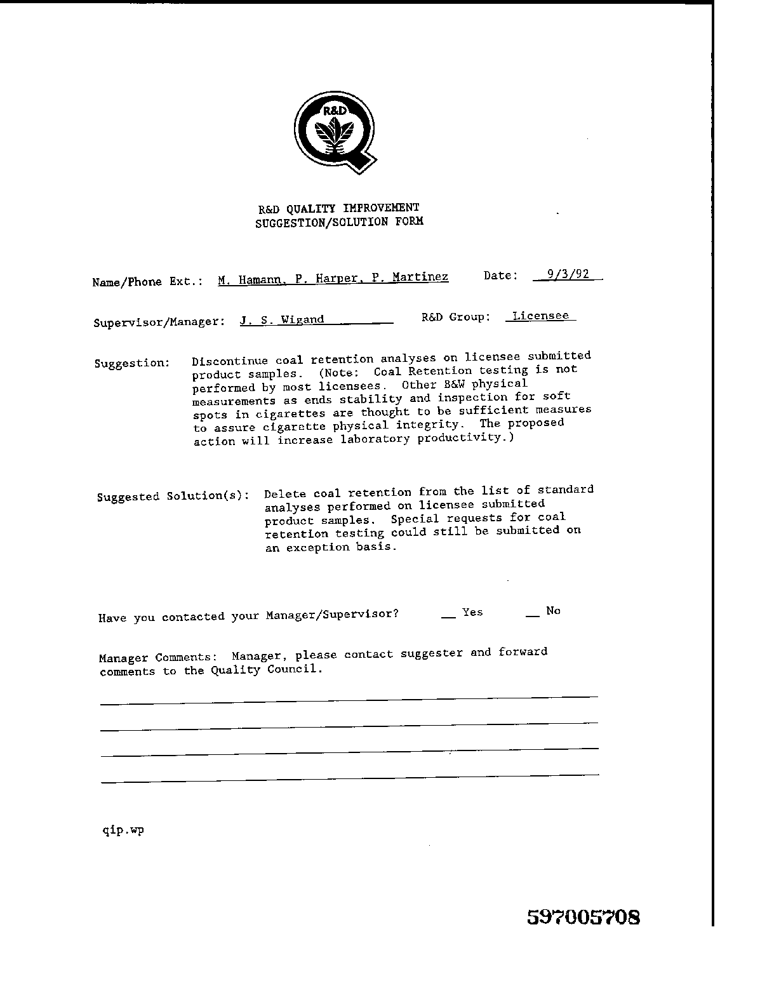

In [24]:
Image.open(str(test_image))

In [12]:
image = Image.open(str(test_image)).convert("RGB")

In [13]:

# layoutLMv3 Feature extractor

feature_extractor = LayoutLMv3FeatureExtractor(apply_ocr=True, ocr_lang="eng")
tokenizer = LayoutLMv3TokenizerFast.from_pretrained("microsoft/layoutlmv3-base")
processor = LayoutLMv3Processor(feature_extractor, tokenizer)
     

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [14]:
model = LayoutLMv3ForSequenceClassification.from_pretrained("microsoft/layoutlmv3-base")

Downloading:   0%|          | 0.00/856 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of LayoutLMv3ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:

encoding = processor(
    image, 
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask', 'bbox', 'pixel_values'])

In [16]:
print(f"""
input_ids: {list(encoding["input_ids"].squeeze().shape)} # max_length
word_boxes: {list(encoding["bbox"].squeeze().shape)} # same shape as id but the number 4 is for bbox top, left, bottom, right
image data: {list(encoding["pixel_values"].squeeze().shape)} # convereted into a sqaure image 3 is for RGB
image size: {image.size}
""")


input_ids: [512] # max_length
word_boxes: [512, 4] # same shape as id but the number 4 is for bbox top, left, bottom, right
image data: [3, 224, 224] # convereted into a sqaure image 3 is for RGB
image size: (762, 1000)



In [17]:

# let's print what's in feature_extractor
# summary of it's configuration 
feature_extractor
     

LayoutLMv3FeatureExtractor {
  "apply_ocr": true,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "LayoutLMv3FeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "ocr_lang": "eng",
  "resample": 2,
  "size": 224
}

In [18]:

#b let's use the extractor on the image

features = feature_extractor(image) # this will run tesseract for us

In [20]:
# we should get same number of bbox as word count

print(f"""
image size: {features["pixel_values"][0].shape}
word count: {len(features["words"][0])}
word boxes: {len(features["boxes"][0])}
""")
     


image size: (3, 224, 224)
word count: 127
word boxes: 127



In [21]:

features["boxes"][0] #outputs some of the bounding boxes for image[0]
     

[[339, 206, 366, 214],
 [376, 204, 439, 215],
 [450, 203, 549, 212],
 [335, 217, 509, 229],
 [519, 216, 556, 226],
 [122, 277, 212, 289],
 [223, 277, 263, 285],
 [284, 264, 304, 293],
 [286, 275, 368, 286],
 [388, 274, 402, 283],
 [414, 273, 497, 284],
 [490, 264, 507, 293],
 [515, 272, 587, 282],
 [635, 271, 677, 280],
 [719, 269, 772, 278],
 [123, 317, 293, 330],
 [314, 316, 322, 325],
 [342, 316, 356, 324],
 [368, 315, 425, 323],
 [553, 313, 581, 321],
 [589, 313, 641, 323],
 [673, 311, 746, 321],
 [124, 358, 220, 370],
 [251, 357, 350, 366],
 [362, 355, 397, 364],
 [408, 354, 489, 364],
 [500, 354, 572, 364],
 [582, 355, 599, 361],
 [610, 352, 681, 361],
 [692, 350, 775, 360],
 [253, 370, 314, 382],
 [326, 369, 388, 380],
 [419, 368, 469, 379],
 [490, 367, 526, 376],
 [536, 366, 619, 375],
 [629, 365, 692, 376],
 [703, 365, 719, 373],
 [729, 365, 757, 373],
 [253, 383, 334, 395],
 [343, 383, 360, 394],
 [371, 384, 408, 391],
 [418, 381, 498, 391],
 [527, 380, 572, 389],
 [583, 380,

In [22]:
# image data is going to come from pixel_values
# let's check teh shape

image_data = features["pixel_values"][0]
image_data.shape
     

(3, 224, 224)

In [25]:

# we have to swap the dimension meaning take the transpose of the image data so [3,224,224] becomes
# [224,224,3]

image_data = image_data.transpose(1,2,0)
image_data.shape

(224, 224, 3)

In [27]:

# import step to convert floats to integers 29.58 mins

image_data = np.uint8(image_data * 255)
image_data[0][0]
     

array([184, 184, 184], dtype=uint8)

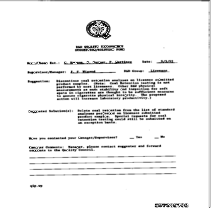

In [28]:
# finally we have to open image data in array format in RGB mode
# this is the image that's fed into the model after feature extraction
# this is the iamge that's fed intot he model embedding 

Image.fromarray(image_data, mode="RGB")
     

In [29]:

# now let's take care of teh words

words = features["words"][0]
bounding_boxes = features["boxes"][0]

print(words[:5])
print(bounding_boxes[:5])

#this prints 5 words from the top and the corresponding boxes coordinates 


['R&D', 'QUALITY', 'IMPROVEMENT', 'SUGGESTION/SOLUTION', 'FORM']
[[339, 206, 366, 214], [376, 204, 439, 215], [450, 203, 549, 212], [335, 217, 509, 229], [519, 216, 556, 226]]


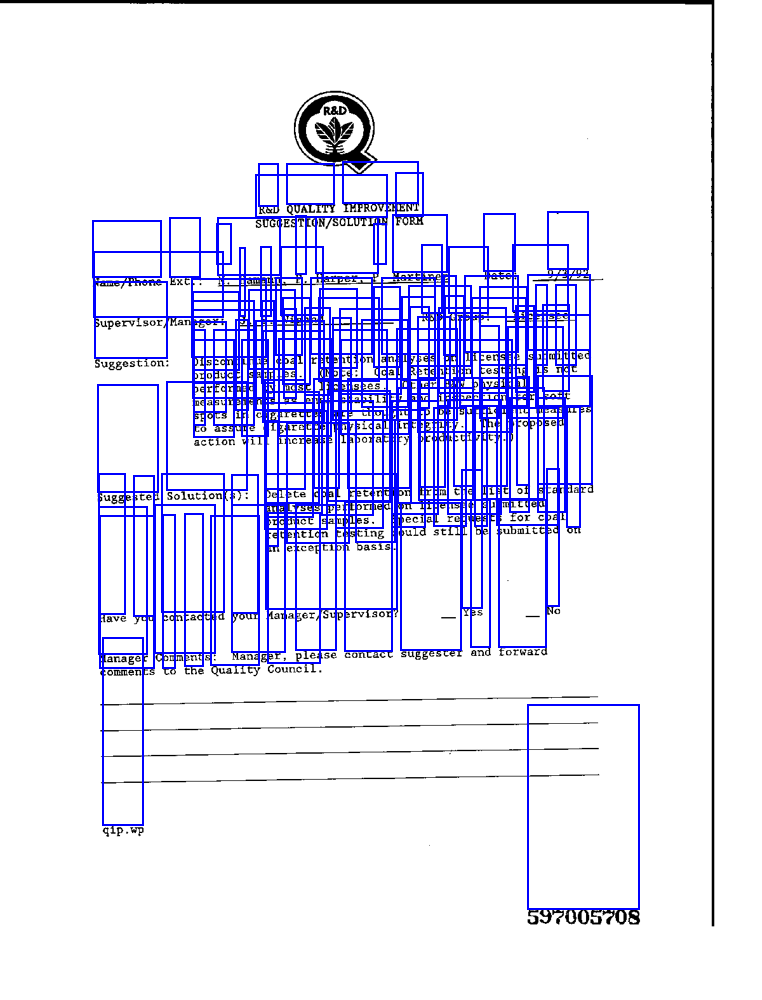

In [38]:

# let's draw the bounding boxes

from PIL import Image, ImageDraw

image = Image.open(str(test_image)).convert("RGB")

width_scale = image.width / 1000
height_scale = image.height / 1000

draw = ImageDraw.Draw(image)

for bbox in bounding_boxes:
  draw.rectangle(
      [
       bbox[0] * width_scale,
       bbox[1] * height_scale,
       bbox[2] * width_scale,
       bbox[3] * width_scale
      ], 
                 outline="blue", 
                 width=2)
image
     

In [39]:

# word tokenizer 

encoding = tokenizer(
    text = words, 
    boxes = bounding_boxes,
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

encoding.keys()
     

dict_keys(['input_ids', 'attention_mask', 'bbox'])

In [40]:

# now let's see what different types of tokens we have 
# print first 20 tokens to see what it looks like
tokens = tokenizer.convert_ids_to_tokens(
    encoding["input_ids"][0],
    skip_special_tokens=True
)

print(tokens[:20])
     

['ĠR', '&', 'D', 'ĠQU', 'AL', 'ITY', 'ĠIM', 'PROV', 'EMENT', 'ĠS', 'UG', 'G', 'EST', 'ION', '/', 'S', 'OL', 'UTION', 'ĠFORM', 'ĠN']


In [42]:


# to convert messy tokens
 # convert them to strings

tokenizer.convert_tokens_to_string(tokens[:20])

 # this will put the messy looking tokens into readable format
     

' R&D QUALITY IMPROVEMENT SUGGESTION/SOLUTION FORM N'

In [52]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [54]:
model = LayoutLMv3ForSequenceClassification.from_pretrained("microsoft/layoutlmv3-base", num_labels=20)

Some weights of LayoutLMv3ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
model.to(device)

LayoutLMv3ForSequenceClassification(
  (layoutlmv3): LayoutLMv3Model(
    (embeddings): LayoutLMv3TextEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
    )
    (patch_embed): LayoutLMv3PatchEmbeddings(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
    (encoder): LayoutLMv3Enco

In [43]:

model.config
     

LayoutLMv3Config {
  "_name_or_path": "microsoft/layoutlmv3-base",
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "coordinate_size": 128,
  "eos_token_id": 2,
  "has_relative_attention_bias": true,
  "has_spatial_attention_bias": true,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "input_size": 224,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_2d_position_embeddings": 1024,
  "max_position_embeddings": 514,
  "max_rel_2d_pos": 256,
  "max_rel_pos": 128,
  "model_type": "layoutlmv3",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "patch_size": 16,
  "rel_2d_pos_bins": 64,
  "rel_pos_bins": 32,
  "second_input_size": 112,
  "shape_size": 128,
  "text_embed": true,
  "torch_dtype": "float32",
  "transformers_version": "4.20.1",
  "type_vocab_size": 1,
  "visual_embed": true,
  "vocab_size": 50265
}

In [45]:

encoding = processor(
    image,
    max_length=512,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
)

outputs = model(**encoding)
     

/Users/manjulamishra/Library/Python/3.7/lib/python/site-packages/transformers/modeling_utils.py:813: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  "The `device` argument is deprecated and will be removed in v5 of Transformers.", FutureWarning


In [46]:

outputs.logits

tensor([[ 0.1346, -0.0917]], grad_fn=<AddmmBackward>)

In [51]:
loss = outputs.loss